In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root:@localhost:3306/PRACTICA')


In [32]:

df_employees   = pd.read_sql_table('EM_EMPLEADOS', con=engine)
df_assignments = pd.read_sql_table('PR_EMPLEADOS_PROYECTO', con=engine)
df_projects    = pd.read_sql_table('PR_PROYECTOS', con=engine)

print("Columns in EM_EMPLEADOS:", df_employees.columns)
print("Columns in PR_EMPLEADOS_PROYECTO:", df_assignments.columns)
print("Columns in PR_PROYECTOS:", df_projects.columns)


Columns in EM_EMPLEADOS: Index(['ID_EMPLEADO', 'TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2',
       'F_NACIMIENTO', 'N_TELEFONO1', 'N_TELEFONO2', 'TX_EMAIL', 'F_ALTA',
       'F_BAJA', 'CX_EDOCIVIL', 'B_FORMACIONU'],
      dtype='object')
Columns in PR_EMPLEADOS_PROYECTO: Index(['ID_PROYECTO', 'ID_EMPLEADO', 'F_ALTA'], dtype='object')
Columns in PR_PROYECTOS: Index(['ID_PROYECTO', 'TX_DESCRIPCIÓN', 'F_INICIO', 'F_FIN', 'F_BAJA',
       'TX_LUGAR', 'TX_OBSERVACIONES'],
      dtype='object')


Distribución del número de proyectos asignados a empleados activos (F_BAJA is null):
Personas asignadas a 0 proyecto(s): 3
Personas asignadas a 1 proyecto(s): 11
Personas asignadas a 2 proyecto(s): 6
Personas asignadas a 3 proyecto(s): 3
Personas asignadas a 4 proyecto(s): 2
Personas asignadas a 6 proyecto(s): 1
Personas asignadas a 7 proyecto(s): 1
Personas asignadas a 9 proyecto(s): 1


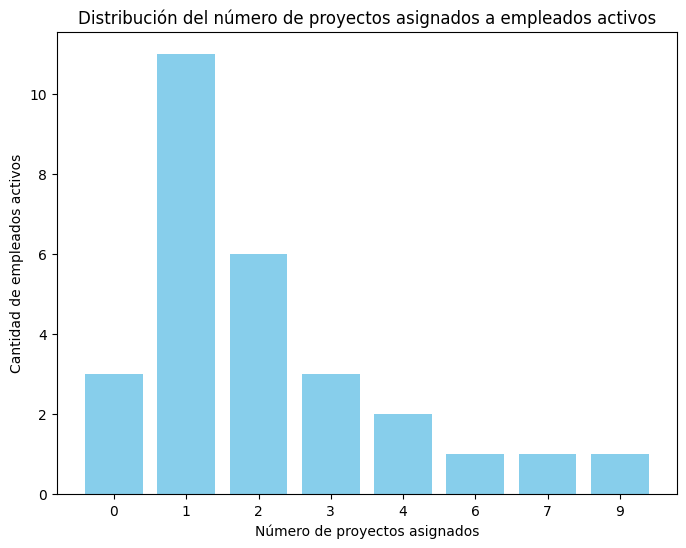

In [33]:

df_active = df_employees[df_employees['F_BAJA'].isnull()]
active_employee_ids = df_active['ID_EMPLEADO']


df_active_assignments = df_assignments[df_assignments['ID_EMPLEADO'].isin(active_employee_ids)]


assignment_counts = df_active_assignments.groupby('ID_EMPLEADO').size()


employees_without_assignment = active_employee_ids[~active_employee_ids.isin(assignment_counts.index)]
num_without_assignment = len(employees_without_assignment)


distribution = assignment_counts.value_counts().sort_index()


if 0 in distribution:
    distribution[0] += num_without_assignment
else:
    distribution.loc[0] = num_without_assignment


distribution = distribution.sort_index()


print("Distribución del número de proyectos asignados a empleados activos (F_BAJA is null):")
for num_projects, count in distribution.items():
    print(f"Personas asignadas a {num_projects} proyecto(s): {count}")


plt.figure(figsize=(8, 6))
plt.bar(distribution.index.astype(str), distribution.values, color='skyblue')
plt.xlabel("Número de proyectos asignados")
plt.ylabel("Cantidad de empleados activos")
plt.title("Distribución del número de proyectos asignados a empleados activos")
plt.show()


Top 5 proyectos con más personas asignadas:
Proyecto Digital Marketing Platform (ID: 26): 11 personas asignadas
Proyecto Data Analysis Platform (ID: 17): 10 personas asignadas
Proyecto AI Chatbot Integration (ID: 19): 9 personas asignadas
Proyecto Cybersecurity Audit (ID: 23): 9 personas asignadas
Proyecto E-commerce Backend Revamp (ID: 20): 8 personas asignadas


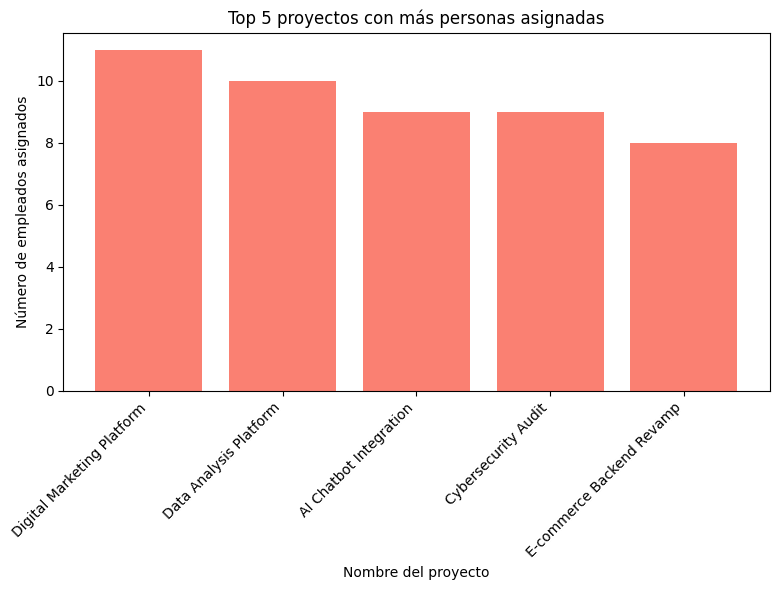

In [34]:

project_employee_count = df_assignments.groupby('ID_PROYECTO')['ID_EMPLEADO'].nunique()


top5_projects = project_employee_count.sort_values(ascending=False).head(5)


df_top5 = top5_projects.reset_index(name='num_empleados')


df_top5 = df_top5.merge(df_projects[['ID_PROYECTO', 'TX_DESCRIPCIÓN']], on='ID_PROYECTO', how='left')


print("Top 5 proyectos con más personas asignadas:")
for index, row in df_top5.iterrows():
    print(f"Proyecto {row['TX_DESCRIPCIÓN']} (ID: {row['ID_PROYECTO']}): {row['num_empleados']} personas asignadas")


plt.figure(figsize=(8, 6))
plt.bar(df_top5['TX_DESCRIPCIÓN'], df_top5['num_empleados'], color='salmon')
plt.xlabel("Nombre del proyecto")
plt.ylabel("Número de empleados asignados")
plt.title("Top 5 proyectos con más personas asignadas")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [35]:
# Get the list of projects that appear in the assignments table
assigned_projects = df_assignments['ID_PROYECTO'].unique()

# Identify projects not appearing in the assignments (anomaly detection)
projects_without_assignments = df_projects[~df_projects['ID_PROYECTO'].isin(assigned_projects)]

print("Proyectos sin personas asignadas:")
print(projects_without_assignments[['ID_PROYECTO', 'TX_DESCRIPCIÓN']])


Proyectos sin personas asignadas:
    ID_PROYECTO                TX_DESCRIPCIÓN
10           27         Cloud Cost Monitoring
11           28     Inventory Tracking System
14           31        Online Payment Gateway
16           33        Data Lake Architecture
17           34  Business Intelligence Portal
19           36      Internal Training Portal
